In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()

In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [12]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5062 - accuracy: 0.8193 - val_loss: 0.3181 - val_accuracy: 0.8821
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3346 - accuracy: 0.8776 - val_loss: 0.2721 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2846 - accuracy: 0.8981 - val_loss: 0.2539 - val_accuracy: 0.9063
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2550 - accuracy: 0.9086 - val_loss: 0.2353 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2292 - accuracy: 0.9161 - val_loss: 0.2453 - val_accuracy: 0.9108
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2109 - accuracy: 0.9227 - val_loss: 0.2146 - val_accuracy: 0.9192
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1917 - accuracy: 0.9291 - val_loss: 0.2157 - val_accuracy:

In [13]:
import matplotlib.pyplot as plt

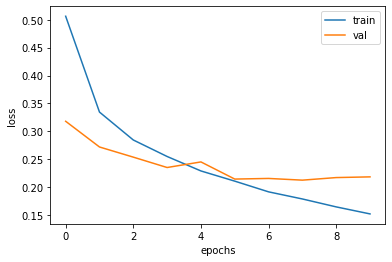

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9233


[0.21267013251781464, 0.9232500195503235]

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[3.6635062e-21 8.0752315e-24 1.2843932e-22 1.9349653e-19 5.6612668e-20
  1.4332803e-16 2.8835613e-20 1.9990418e-17 1.0000000e+00 1.8184659e-20]]


In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [18]:
import numpy as np

In [19]:
print(classes[np.argmax(preds)])

가방


In [20]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [21]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2442 - accuracy: 0.9139


[0.2441931813955307, 0.9139000177383423]

In [22]:
from tensorflow import keras

In [23]:
model = keras.models.load_model('best-cnn-model.h5')

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [26]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [27]:
conv_weights = conv.weights[0].numpy()

In [29]:
print(conv_weights.mean(), conv_weights.std())

-0.02866194 0.27453667


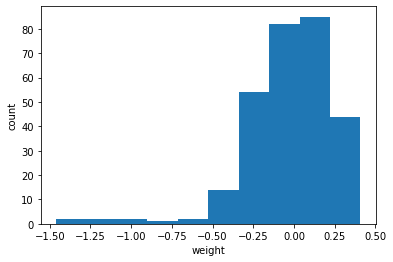

In [30]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

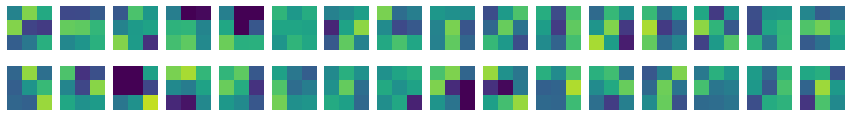

In [31]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin = -0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [32]:
dense1 = keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')

In [36]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


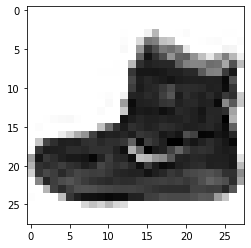

In [37]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [39]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

In [40]:
inputs = train_input[0].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [41]:
print(feature_maps.shape)

(1, 28, 28, 32)


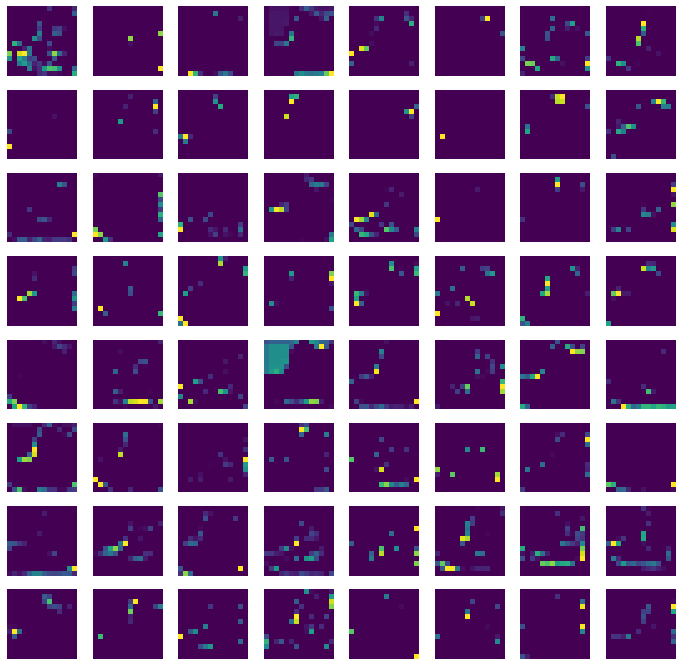

In [49]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [44]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [45]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [46]:
print(feature_maps.shape)

(1, 14, 14, 64)
